# Script contents:
1. Import libraries and dataframe
2. Data wrangling
3. Bar chart
4. Recreating dual axis line chart
5. Box plot
6. Facet grid

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime as dt
import seaborn as sns


In [2]:
df = pd.read_csv(
    "NY_citibikes_data.csv",
      usecols=["ride_id", "start_station_name","member_casual", "avgTemp", "date"] 
)

In [3]:
df.head()

ride_id       start_station_name member_casual        date  \
0  BFD29218AB271154  West End Ave & W 107 St        member  2022-01-21   
1  7C953F2FD7BE1302             4 Ave & 3 St        member  2022-01-10   
2  95893ABD40CED4B8          1 Ave & E 62 St        member  2022-01-26   
3  F853B50772137378          2 Ave & E 96 St        member  2022-01-03   
4  7590ADF834797B4B          6 Ave & W 34 St        member  2022-01-22   

   avgTemp  
0     -6.0  
1      1.6  
2     -2.3  
3      1.4  
4     -5.9

In [4]:
df.dtypes


ride_id                object
start_station_name     object
member_casual          object
date                   object
avgTemp               float64
dtype: object

In [5]:
df["date"] = pd.to_datetime(df["date"])  ## change date to date format

In [6]:
df = df.sort_values("date") ##Arrange dates in a chronological order

In [7]:
df.head()

ride_id                   start_station_name member_casual  \
7012723   34BD74D84D320CF5  W 144 St & Adam Clayton Powell Blvd        casual   
16758689  FA436228F4CD7647                   Kent Ave & S 11 St        casual   
10829245  8FC77EAE2C0561E4                     Union St & 4 Ave        casual   
2167335   BF45D1E037463AA8                N 12 St & Bedford Ave        member   
21775695  763D82F8CFA1D9D1             Willoughby St & Fleet St        casual   

               date  avgTemp  
7012723  2021-01-30      NaN  
16758689 2021-02-15      NaN  
10829245 2021-03-11      NaN  
2167335  2021-03-14      NaN  
21775695 2021-03-31      NaN

In [8]:
# Filter rows where date >= 2022-01-01
df = df[df["date"] >= "2022-01-01"]

In [9]:
df.head()

ride_id              start_station_name member_casual  \
881771  291C8B1D2F451F20     Central Park West & W 76 St        casual   
225211  EE55558726CC75A7                 E 88 St & 1 Ave        casual   
483157  BAE74126E17B6794  Metropolitan Ave & Bedford Ave        casual   
75152   F4151B16DDFE3052                 W 21 St & 6 Ave        member   
390711  E87EDCD278436C83                 5 Ave & E 87 St        member   

             date  avgTemp  
881771 2022-01-01     11.6  
225211 2022-01-01     11.6  
483157 2022-01-01     11.6  
75152  2022-01-01     11.6  
390711 2022-01-01     11.6

### Plot using seaborn library

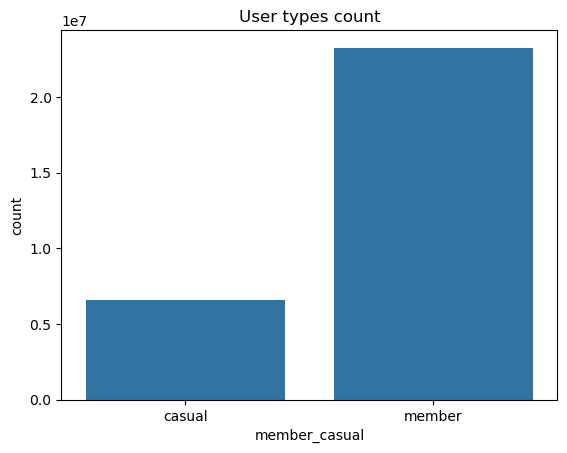

In [10]:
sns.countplot(data = df, x = 'member_casual')
plt.title("User types count")
plt.show()

### 3. Most popular start station- Bar chart

In [11]:
df['value'] = 1
df_t = df.groupby('start_station_name')['value'].count().reset_index()

In [12]:
df_t

start_station_name  value
0                 1 Ave & E 110 St  21526
1                  1 Ave & E 16 St  67349
2                  1 Ave & E 18 St  70854
3                  1 Ave & E 30 St  45412
4                  1 Ave & E 39 St  52373
...                            ...    ...
1756       Wyckoff Ave & Gates Ave  16556
1757            Wyckoff St & 3 Ave    250
1758        Wyckoff St & Nevins St  11527
1759  Wythe Ave & Metropolitan Ave  66468
1760         Yankee Ferry Terminal  12913

[1761 rows x 2 columns]

In [13]:
top20 = df_t.nlargest(20, 'value')

In [14]:
top20

start_station_name   value
1587           W 21 St & 6 Ave  129016
1718     West St & Chambers St  123289
495         Broadway & W 58 St  114293
286            6 Ave & W 33 St  106440
8              1 Ave & E 68 St  104856
461         Broadway & E 14 St   98862
485         Broadway & W 25 St   98422
1511   University Pl & E 14 St   97120
463         Broadway & E 21 St   95691
1603           W 31 St & 7 Ave   94208
788            E 33 St & 1 Ave   91003
590   Cleveland Pl & Spring St   90973
29            12 Ave & W 40 St   90414
287            6 Ave & W 34 St   89683
1719      West St & Liberty St   87657
24            11 Ave & W 41 St   87577
1105     Lafayette St & E 8 St   87457
562     Central Park S & 6 Ave   87013
796         E 40 St & Park Ave   85598
328            8 Ave & W 33 St   85051

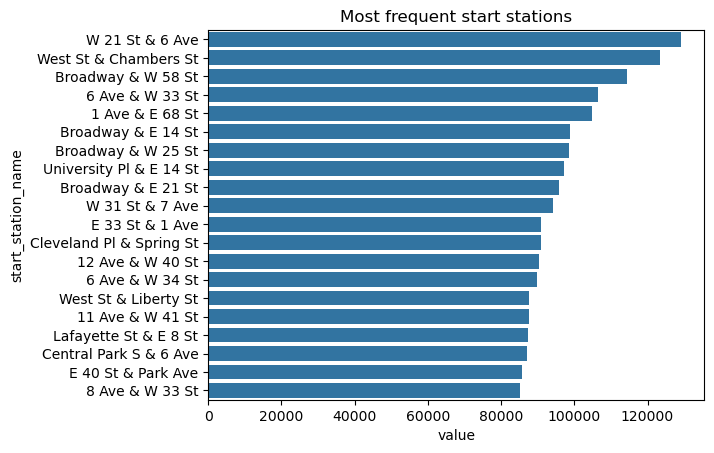

In [15]:
sns.barplot(data = top20, x = 'value', y = 'start_station_name')
plt.title("Most frequent start stations")
plt.show()

#### The bar plot has already chosen a "rainbow colored" theme which is not very intuitive. It is better to have a "palette" with varying shades of hue. Darker colored bar will represent most frequent station and lighter shade will have the least. This can be added in the code line directly. 

C:\Users\akul_\AppData\Local\Temp\ipykernel_3592\2839758038.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = top20, x = 'value', y = 'start_station_name', palette=("Blues_r"))


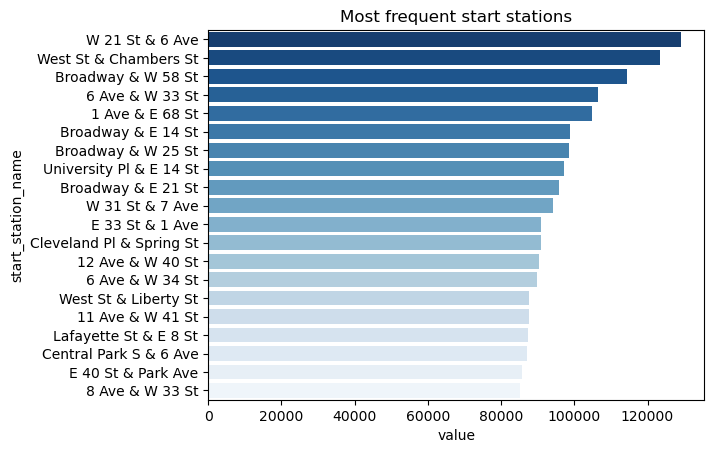

In [16]:
sns.barplot(data = top20, x = 'value', y = 'start_station_name', palette=("Blues_r"))
plt.title("Most frequent start stations")
plt.show()

### 4. Line chart

In [17]:
## group by date and ride id
df_group = pd.DataFrame(df.groupby(['date'])['ride_id'].count()).reset_index()

In [18]:
df_group.head()

date  ride_id
0 2022-01-01    20428
1 2022-01-02    43009
2 2022-01-03    33189
3 2022-01-04    36842
4 2022-01-05    34230

In [19]:
df_group.rename(columns = {'ride_id':'bike_rides_daily'}, inplace = True)
if '_merge' in df.columns:
    df = df.drop(columns=['_merge'])
df = df.merge(df_group, on = 'date', how = 'outer', indicator = True)
print(df['_merge'].value_counts(dropna = False))
print("Shape of January 1st is", df[df['date'] == '2022-01-01'].shape) # Check
print("Shape of January 2nd is", df[df['date'] == '2022-01-02'].shape) # Second check

_merge
both          29838166
left_only            0
right_only           0
Name: count, dtype: int64
Shape of January 1st is (20428, 8)
Shape of January 2nd is (43009, 8)


In [20]:
df.head()

ride_id              start_station_name member_casual       date  \
0  291C8B1D2F451F20     Central Park West & W 76 St        casual 2022-01-01   
1  EE55558726CC75A7                 E 88 St & 1 Ave        casual 2022-01-01   
2  BAE74126E17B6794  Metropolitan Ave & Bedford Ave        casual 2022-01-01   
3  F4151B16DDFE3052                 W 21 St & 6 Ave        member 2022-01-01   
4  E87EDCD278436C83                 5 Ave & E 87 St        member 2022-01-01   

   avgTemp  value  bike_rides_daily _merge  
0     11.6      1             20428   both  
1     11.6      1             20428   both  
2     11.6      1             20428   both  
3     11.6      1             20428   both  
4     11.6      1             20428   both

In [23]:
df = df.set_index('date')  # set date as index for resampling

### The dataframe is resampled to weekly since it is very large

In [24]:
df_weekly = pd.DataFrame()
df_weekly['bike_rides_daily'] = df['bike_rides_daily'].resample('W').sum()   # sum weekly rides
df_weekly['avgTemp'] = df['avgTemp'].resample('W').mean()                     # mean weekly temperature
df_weekly.reset_index(inplace=True)  # bring date back as a column

C:\Users\akul_\AppData\Local\Temp\ipykernel_3592\1812613712.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='date', y='bike_rides_daily', data=df_weekly, color='b', ax=ax, ci=None)
C:\Users\akul_\AppData\Local\Temp\ipykernel_3592\1812613712.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='date', y='avgTemp', data=df_weekly, color='r', ax=ax2, ci=None)


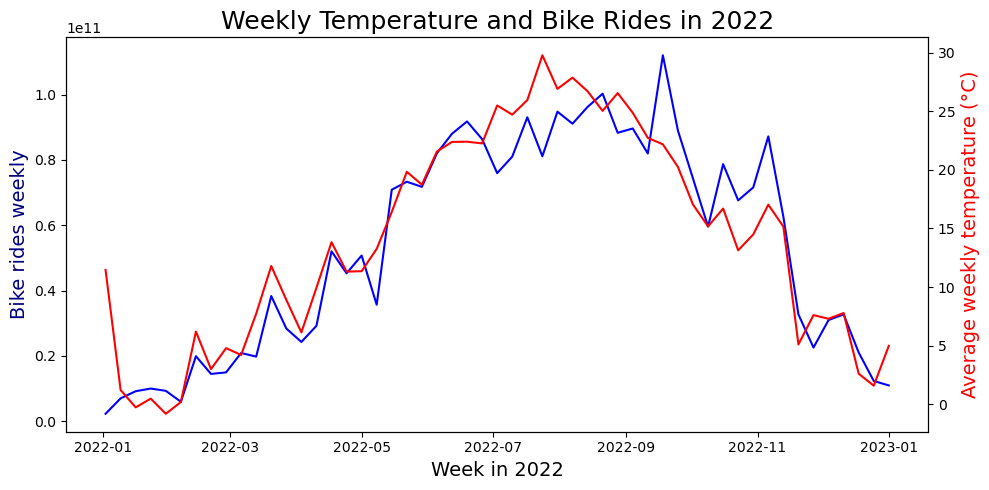

In [25]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.lineplot(x='date', y='bike_rides_daily', data=df_weekly, color='b', ax=ax, ci=None)
ax.set_xlabel("Week in 2022", fontsize=14)
ax.set_ylabel("Bike rides weekly", color="navy", fontsize=14)

ax2 = ax.twinx()
sns.lineplot(x='date', y='avgTemp', data=df_weekly, color='r', ax=ax2, ci=None)
ax2.set_ylabel("Average weekly temperature (°C)", color="red", fontsize=14)

plt.title('Weekly Temperature and Bike Rides in 2022', fontsize=18)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("weekly_temperature_vs_trips_2022.png", dpi=300, bbox_inches="tight")
plt.show()

#### The dataset was very large hence it was resampled to weeköy data to create the plot.

### 4. Box plots for member_casual and weekly bike rides

In [27]:
df.columns

Index(['ride_id', 'start_station_name', 'member_casual', 'avgTemp', 'value',
       'bike_rides_daily', '_merge'],
      dtype='object')

In [28]:
df.head()

ride_id              start_station_name member_casual  \
date                                                                         
2022-01-01  291C8B1D2F451F20     Central Park West & W 76 St        casual   
2022-01-01  EE55558726CC75A7                 E 88 St & 1 Ave        casual   
2022-01-01  BAE74126E17B6794  Metropolitan Ave & Bedford Ave        casual   
2022-01-01  F4151B16DDFE3052                 W 21 St & 6 Ave        member   
2022-01-01  E87EDCD278436C83                 5 Ave & E 87 St        member   

            avgTemp  value  bike_rides_daily _merge  
date                                                 
2022-01-01     11.6      1             20428   both  
2022-01-01     11.6      1             20428   both  
2022-01-01     11.6      1             20428   both  
2022-01-01     11.6      1             20428   both  
2022-01-01     11.6      1             20428   both

In [29]:
df_weekly_member = df.groupby([pd.Grouper(freq='W'), 'member_casual'])['bike_rides_daily'].sum().reset_index()

C:\Users\akul_\AppData\Local\Temp\ipykernel_3592\2709793240.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='member_casual', y='bike_rides_daily', data=df_weekly_member, palette='Blues')


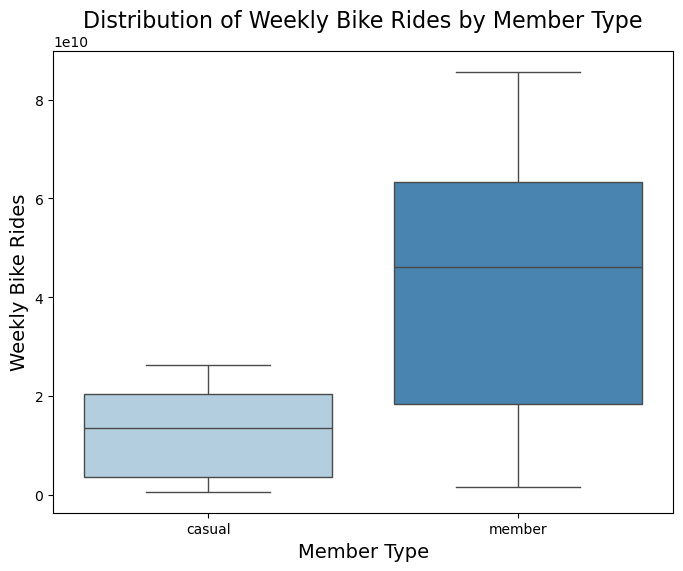

In [31]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='member_casual', y='bike_rides_daily', data=df_weekly_member, palette='Blues')
plt.xlabel("Member Type", fontsize=14)
plt.ylabel("Weekly Bike Rides", fontsize=14)
plt.title("Distribution of Weekly Bike Rides by Member Type", fontsize=16)
plt.savefig("weekly_bike_rides_boxplot.png", dpi=300, bbox_inches="tight")
plt.show()

#### Clearly, the box plot depicts that the weekly bike rides by the members are much more higher and frequent than casual riders. 

### 5. Facet grids

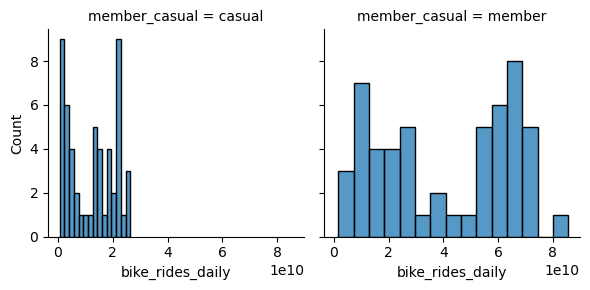

In [32]:
grid = sns.FacetGrid(df_weekly_member, col = "member_casual")
grid.map(sns.histplot, "bike_rides_daily", bins = 15)
plt.show()

#### The facet grid compares the weekly bike rides between members and casual riders. As expected, the bike rides among members is more uniformly distributed and the frequency is higher than casual riders.

### 5a. Another facet grid can be created for user type based on weekly bike rides and average temperature. 

In [36]:
# 1. Aggregate weekly bike rides by member type
df_weekly_member = df.groupby([pd.Grouper(freq='W'), 'member_casual'])['bike_rides_daily'].sum().reset_index()


In [37]:
# 2. Aggregate weekly average temperature (one row per week)
df_weekly_temp = df.resample('W')['avgTemp'].mean().reset_index()

In [38]:

# 3. Merge temperature into the member-level weekly data
df_weekly_member = df_weekly_member.merge(df_weekly_temp, on='date', how='left')

In [39]:
df_weekly_member

date member_casual  bike_rides_daily    avgTemp
0   2022-01-02        casual         646301001  11.464404
1   2022-01-02        member        1620776264  11.464404
2   2022-01-09        casual        1015472877   1.210536
3   2022-01-09        member        5983127344   1.210536
4   2022-01-16        casual        1242023126  -0.268863
..         ...           ...               ...        ...
101 2022-12-18        member       18385912523   2.605453
102 2022-12-25        casual        1420051798   1.583939
103 2022-12-25        member       10898954177   1.583939
104 2023-01-01        casual        2132834994   4.982123
105 2023-01-01        member        8808246748   4.982123

[106 rows x 4 columns]

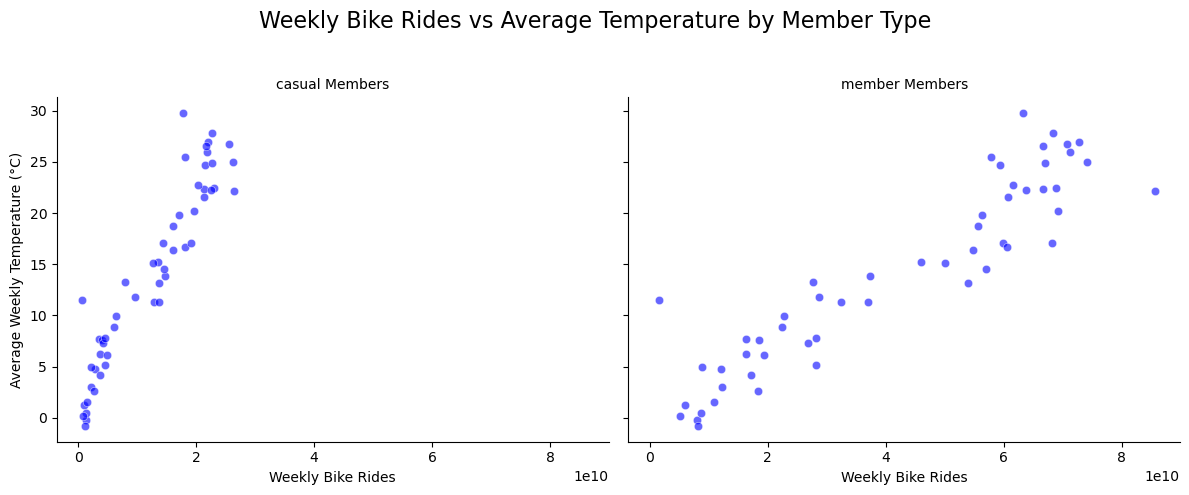

In [40]:

# Initialize FacetGrid
g = sns.FacetGrid(df_weekly_member, col="member_casual", height=5, aspect=1.2)

# Map scatter plot onto the grid
g.map_dataframe(sns.scatterplot, x="bike_rides_daily", y="avgTemp", color='blue', alpha=0.6)

# Add axis labels and title
g.set_axis_labels("Weekly Bike Rides", "Average Weekly Temperature (°C)")
g.set_titles(col_template="{col_name} Members")
g.fig.suptitle("Weekly Bike Rides vs Average Temperature by Member Type", fontsize=16)
g.fig.tight_layout(rect=[0, 0, 1, 0.95])  # adjust layout to fit suptitle


#### The scatterplot clearly shows that the weekly bike rides count is higher for members and the effect of average temperature is also less on members. The slope between temperature and bike rides is steep for casual riders. This means that the members are less impacted by weather in comparison to casual riders. 

In [41]:
g.savefig("facetgrid_bike_rides_vs_temp.png", dpi=300)

In [42]:
df.to_csv('NY_citibikes_data.csv')